In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import jacobi as Jacobi


def chop(X,d=3,suppress=True,eps=1e-10):
    M = np.copy(X)
    w = np.where(np.abs(M) < eps)
    M[w] = 0.0
    np.set_printoptions(precision=d,suppress=suppress,linewidth=10**np.inf)
    print(M)
    print()

$$
\text{P}^{(a,b)}(z) \ = \ \left[ P_{0}^{(a,b)}(z), \ldots,  P_{n}^{(a,b)}(z) , \ldots\right]
$$

<br>

$$
\text{P}^{(a,b)}(-z) \ = \ \text{P}^{(b,a)}(z)\, \Pi
$$

<br>


$$
1 \, \text{P}^{(a,b)}(z) \ = \ \text{P}^{(a+1,b)}(z)\, A_{a,b}^{+}, \qquad (1-z) \, \text{P}^{(a,b)}(z) \ = \ \text{P}^{(a-1,b)}(z)\, A_{a,b}^{-}
$$


$$
1 \, \text{P}^{(a-1,b)}(z) \ = \ \text{P}^{(a,b)}(z)\, A_{a-1,b}^{+}, \qquad (1-z) \, \text{P}^{(a+1,b)}(z) \ = \ \text{P}^{(a,b)}(z)\, A_{a+1,b}^{-}
$$



<br>

$$
\left[b + (1+z)\frac{d}{dz} \right] \, \text{P}^{(a,b)}(z) \ = \ \text{P}^{(a+1,b-1)}(z)\, C_{a,b}^{+}, \qquad
\left[a - (1-z)\frac{d}{dz} \right] \, \text{P}^{(a,b)}(z) \ = \ \text{P}^{(a-1,b+1)}(z)\, C_{a,b}^{-}
$$


<br>

$$
\frac{d}{dz} \, \text{P}^{(a,b)}(z) \ = \ \text{P}^{(a+1,b+1)}(z)\, {D}_{a,b}^{+},\qquad
\left[ a(1+z) - b(1-z)   - (1-z^{2})\frac{d}{dz}\right] \, \text{P}^{(a,b)}(z) \ = \ \text{P}^{(a-1,b-1)}(z)\, {D}_{a,b}^{-}
$$




Get some operators

In [6]:
A  = Jacobi.operator('A')
B  = Jacobi.operator('B')
C  = Jacobi.operator('C')
D  = Jacobi.operator('D')
Z  = Jacobi.operator('Z')
N  = Jacobi.operator('N')
I  = Jacobi.operator('Id')
Pi = Jacobi.operator('Pi')

Check codomains

In [215]:
print(A(-1).codomain)
print((A(-1)@Pi).codomain)
print((Pi@A(-1)).codomain)
print((Pi@A(-1)@Pi).codomain)

(n->n+1,a->a-1,b->b)
(n->n+1,a->b-1,b->a)
(n->n+1,a->b,b->a-1)
(n->n+1,a->a,b->b-1)


Grid vs coefficient test.

In [216]:
nab = n,a,b = 12,1,1/2

z,w = Jacobi.quadrature(n,a,b)

P = lambda dn,da,db : Jacobi.polynomials(n+dn,a+da,b+db,z).T
d = lambda Op: Op.codomain[:3]
R = lambda Op: Op(*nab)
L = np.diag

err = lambda thing: print(np.max(np.abs(thing)))

err(          P(0,0,0) - P( *d( A(+1) )) @ R( A(+1) ) )
err(          P(0,0,0) - P( *d( B(+1) )) @ R( B(+1) ) )
err( L(1-z) @ P(0,0,0) - P( *d( A(-1) )) @ R( A(-1) ) )
err( L(1+z) @ P(0,0,0) - P( *d( B(-1) )) @ R( B(-1) ) )


err( Jacobi.polynomials(n,a,b,-z).T - Jacobi.polynomials(n,b,a,z).T @ R( Pi ) )

1.1324274851176597e-14
6.661338147750939e-15
8.881784197001252e-15
3.019806626980426e-14
7.105427357601002e-15


In [217]:
nab = n,a,b = 14,1,1/2

z,w = Jacobi.quadrature(n,a,b)

P = lambda nab,z : Jacobi.polynomials(*nab,z).T
L = np.diag
d = lambda Op,nab: Op.codomain(*nab)

size = lambda thing: print(np.max(np.abs(thing)))

size(          P(nab, z) - P( d(A(+1),nab), z) @ A(+1)(*nab) )
size(          P(nab, z) - P( d(B(+1),nab), z) @ B(+1)(*nab) )
size( L(1-z) @ P(nab, z) - P( d(A(-1),nab), z) @ A(-1)(*nab) )
size( L(1+z) @ P(nab, z) - P( d(B(-1),nab), z) @ B(-1)(*nab) )
size(          P(nab,-z) - P(    d(Pi,nab), z) @    Pi(*nab) )

2.0872192862952943e-14
7.105427357601002e-15
7.993605777301127e-15
3.907985046680551e-14
1.687538997430238e-14


We can defie a simple function: 

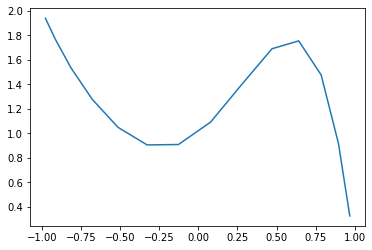

In [218]:
f = lambda z: 1 + z + 2*z**2 - z**3 - 2*z**4 - z**5
plt.plot(z,f(z))

The operator function does the right thing:

In [219]:
F = f(Z)

size( L( f(z) ) @ P(nab,z) - P( d(F,nab), z) @ F(*nab) )

3.552713678800501e-15


The actual operator:

In [220]:
chop(F(*nab).todense(),d=3)
F(*nab)

[[ 1.223  0.065  0.215 -0.174 -0.099 -0.028  0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.065  1.462 -0.059  0.072 -0.244 -0.114 -0.029  0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.215 -0.059  1.327 -0.137  0.036 -0.26  -0.118 -0.03   0.     0.     0.     0.     0.     0.   ]
 [-0.174  0.072 -0.137  1.29  -0.158  0.023 -0.268 -0.121 -0.031  0.     0.     0.     0.     0.   ]
 [-0.099 -0.244  0.036 -0.158  1.275 -0.168  0.015 -0.272 -0.122 -0.031  0.     0.     0.     0.   ]
 [-0.028 -0.114 -0.26   0.023 -0.168  1.267 -0.174  0.011 -0.274 -0.123 -0.031  0.     0.     0.   ]
 [ 0.    -0.029 -0.118 -0.268  0.015 -0.174  1.263 -0.177  0.009 -0.276 -0.123 -0.031  0.     0.   ]
 [ 0.     0.    -0.03  -0.121 -0.272  0.011 -0.177  1.26  -0.179  0.007 -0.277 -0.123 -0.031  0.   ]
 [ 0.     0.     0.    -0.031 -0.122 -0.274  0.009 -0.179  1.258 -0.181  0.005 -0.278 -0.124 -0.031]
 [ 0.     0.     0.     0.    -0.031 -0.123 -0.276  0.007 -0.181  1.256 -0.182  0.005 -0.27

<19x14 Infinite Compressed Sparse Row matrix; with 139 stored elements>

But we can't compute the full matrix-valued function on the grid without some aliasing.

In [211]:
chop( abs(P( d(F,nab), z).T @ L( w*f(z) ) @ P(nab,z) -  F(*nab) ))

[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.031]
 [0.    0.    0.    0.    0.    0.    0.   

Operator algebra tests

In [152]:
nab = n,a,b = (400,2,2)

def norm(X,eps=1e-8): 
    print(np.max(np.abs(X(*nab))) < 1e-9)

# I've hijacked the * for the Lie bracket.
# X * Y = X @ Y - Y @ X
M = D(+1) * D(-1)
S = C(+1) * C(-1)

M = A(0) + B(0)
S = A(0) - B(0)

norm(M * S)

for p in (-1,1):
    
    norm( Pi @ C(p) @ Pi - C(-p) )
    norm( Pi @ D(p) @ Pi + D(+p) )
    norm( Pi @ A(p) @ Pi - B(+p) )
    norm( Pi @ B(p) @ Pi - A(+p) )
    
    norm( Z * C(p)  + p * A(p) @ B(-p) )
    norm( Z * D(p)  + p * A(p) @ B(+p) )
    
    norm( M * D(p) - 2*p*D(p) )
    norm( M * C(p)            )
    norm( M * A(p) -   p*A(p) )
    norm( M * B(p) -   p*B(p) )
    
    norm( S * D(p)            )
    norm( S * C(p) - 2*p*C(p) )
    norm( S * A(p) -   p*A(p) )
    norm( S * B(p) +   p*B(p) )
    
    norm( D(p) * C(+p) )
    norm( D(p) * C(-p) )
    
    norm( A(p) * D(+p)           )
    norm( A(p) * D(-p) + p*B(-p) )
    norm( A(p) * C(+p)           )
    norm( A(p) * C(-p) + p*B(+p) )
    
    norm( B(p) * D(+p)           )
    norm( B(p) * D(-p) - p*A(-p) )
    norm( B(p) * C(+p) + p*A(+p) )
    norm( B(p) * C(-p)           )
    
    norm( A(p) * B(+p) )
    norm( A(p) * B(-p) )

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


Extendable sum test

In [153]:
DD = D(+1) @ D(-1)
L = DD + Z


print(Z.codomain)
print(DD.codomain)

print(L.codomain)

(n->n+1,a->a,b->b)
(n->n,a->a,b->b)
(n->n+1,a->a,b->b)
